# Домашняя работа №3 (Курс "Advanced Python", 2 семестр)
## ФИО:

**Тема:** Машинное обучение  
**Выдана:** 12 апреля  
**Мягкий дедлайн:** 19 апреля  
**Жесткий дедлайн:** 24 апреля

#### Данное задание идет с весом 1.5! Т.е за эту работу можно получить максимум 10 * 1.5 = 15 баллов!

**Правила:**
Результат выполнения задания - отчет в формате Jupyter Notebook с кодом и выводами. В ходе выполнения задания требуется реализовать все необходимые алгоритмы, провести эксперименты и ответить на поставленные вопросы. Дополнительные выводы приветствуются. Чем меньше кода и больше комментариев - тем лучше.

Все ячейки должны быть "выполненными", при этом результат должен воспроизвдиться при проверке.

Задание выполняется самостоятельно. **Если вы нашли в Интернете какой-то код, который собираетесь заимствовать, обязательно укажите это в задании.** Если вы советовались с товарищем и/или позаимствовали его решение, обязательно укажите об этом в отчете. Нет ничего плохого в том, что вы пытаетесь разобраться и помогаете друг другу; плохо - когда вы скрываете это и выдаете чужие заслуги за свои. При обнаружении списывания ВСЕМ студентам, имеющим одинаковые списанные решения будет выставлен ОТРИЦАТЕЛЬНЫЙ балл (т.е если задача стоит 4 балла, вы получите не 0, а -4), "оригинал" искаться не будет

Задание, сданное после жесткого дедлайна, не принимается.

Автор задания: Павел Плюснин

# MNIST (10 баллов)
Давайте посмотрим на еще один классический датасет. В нем необходимо классифицировать цифры на изображении

In [64]:
import warnings
from sklearn.datasets import fetch_openml
import numpy as np
warnings.filterwarnings("ignore")

In [17]:
from scipy.io import loadmat
mnist = loadmat("data_for_24.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

In [18]:
print("Размерность данных" , mnist_data.shape)

Размерность данных (70000, 784)


Каждое изображение представляет собой матрицу 28*28 (вектор из 784 значений)

In [19]:
mnist_data[0].reshape((28,28)) #вектор представил в виде матрицы 28*28

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [30]:
#Изображенные цифры (метки классов) содержатся в 
np.unique(mnist_label)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

**Пункт 0 (0.2 балла)**: разделите данные на обучающую и тестовую выборку. На тест оставьте 10% данных

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_label, test_size=0.1, random_state=1)

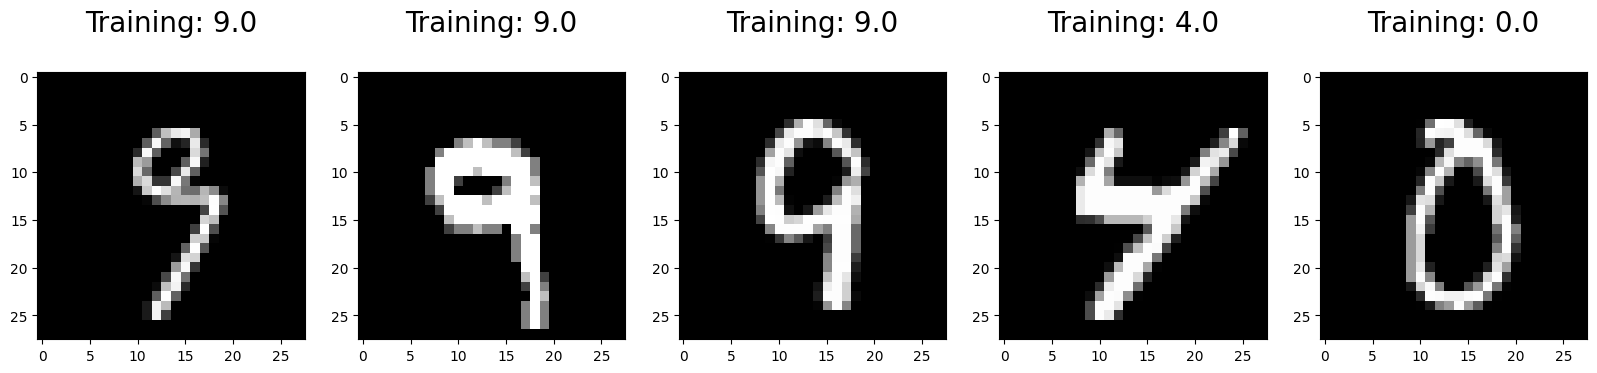

In [32]:
# Посмотрим, как выглядят наши цифры
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

# Модели без предобработки

**Пункт 1.1 (1 балл):** Постройте 3 линейные модели на изображениях как есть (используйте все 784 признака без предобработки). Постройте Логистическую регрессию, а также линейную модель с L2(ridge) и L1(lasso) регуляризаторами. Как долго учились модели? 

**За каждое отсутствие ответа на текстовые вопросы (в том числе за пункты, без проставления баллов) - минус пол балла**

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

In [76]:
%%time
logreg = LogisticRegression().fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

CPU times: user 2min 12s, sys: 4.18 s, total: 2min 16s
Wall time: 21.9 s


In [37]:
%%time
ridge = Ridge().fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

CPU times: user 5.47 s, sys: 593 ms, total: 6.06 s
Wall time: 1.19 s


In [38]:
%%time
lasso = Lasso().fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

CPU times: user 1min 13s, sys: 7.06 s, total: 1min 20s
Wall time: 12.5 s


**Пункт 1.2 (3 балла):** Постройте kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели (вам может помочь поиск по сетке)

In [65]:
from IPython.display import clear_output
from matplotlib import pyplot as plt

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

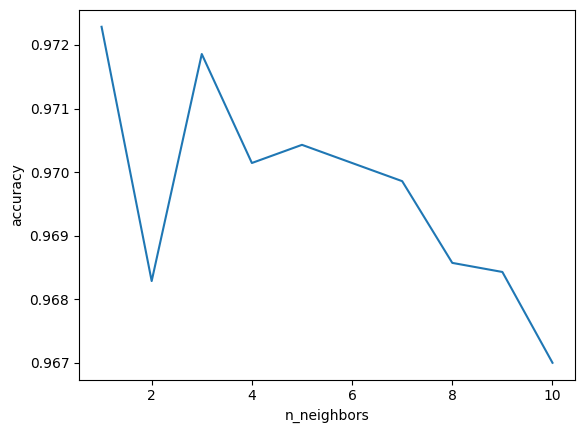

In [67]:
knn_grid = list(range(1, 11))
knn_accuracy = [None for _ in knn_grid]
for k_id in range(len(knn_grid)):
    knn = KNeighborsClassifier(n_neighbors=knn_grid[k_id]).fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracy[k_id] = accuracy_score(y_test, knn_pred)
    clear_output(True)
    plt.plot(knn_grid, knn_accuracy)
    plt.xlabel('n_neighbors')
    plt.ylabel('accuracy')
    plt.show()

In [81]:
best_knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
best_knn_pred = best_knn.predict(X_test)

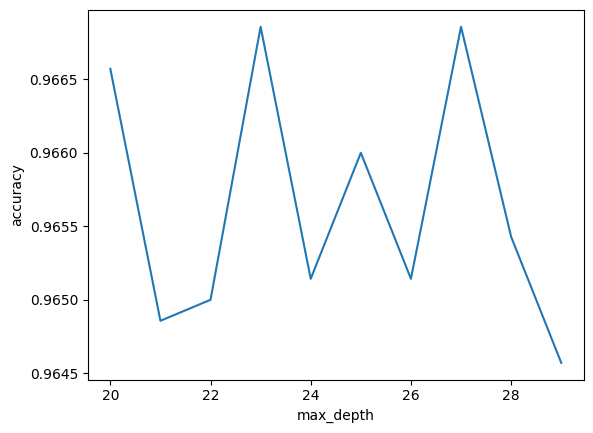

In [71]:
forest_grid = list(range(20, 30))
forest_accuracy = [None for _ in forest_grid]
for depth_id in range(len(forest_grid)):
    forest = RandomForestClassifier(n_estimators=50, max_depth=forest_grid[depth_id]).fit(X_train, y_train)
    forest_pred = forest.predict(X_test)
    forest_accuracy[depth_id] = accuracy_score(y_test, forest_pred)
    clear_output(True)
    plt.plot(forest_grid, forest_accuracy)
    plt.xlabel('max_depth')
    plt.ylabel('accuracy')
    plt.show()

In [72]:
best_forest = RandomForestClassifier(n_estimators=50, max_depth=27).fit(X_train, y_train)
best_forest_pred = best_forest.predict(X_test)

In [74]:
boost_tree = GradientBoostingClassifier(n_estimators=3, max_depth=27, subsample=0.3).fit(X_train, y_train)
boost_tree_pred = boost_tree.predict(X_test)

**Пункт 2.1:**Как вы думаете, можно ли для данной задачи в качестве метрики качества использовать Accuracy? Обоснуйте свой ответ

Accuracy хорошо подходит для бинарной классификации, так как отвечает лишь на один вопрос "Модель угадала?", и то даже для задач бинарной классификации есть метрики точности и полноты, но они работают на вероятностях, поэтому для knn, random forest и boosted trees такая метрика вполне подойдет

**Пункт 2.2:** в любом случае, посмотрите на Accuracy для ваших моделей. Какая из них отработала лучше всего? Как вы думаете, почему?

In [82]:
print('logistic regression accuracy =', accuracy_score(y_test, logreg_pred))
print('ridge accuracy =', accuracy_score(y_test, np.round(ridge_pred, 0)))
print('lasso accuracy =', accuracy_score(y_test, np.round(lasso_pred, 0)))
print('knn accuracy =', accuracy_score(y_test, best_knn_pred))
print('random forest accuracy =', accuracy_score(y_test, best_forest_pred))
print('boosted trees accuracy =', accuracy_score(y_test, boost_tree_pred))

logistic regression accuracy = 0.9184285714285715
ridge accuracy = 0.222
lasso accuracy = 0.208
knn accuracy = 0.9722857142857143
random forest accuracy = 0.9648571428571429
boosted trees accuracy = 0.8942857142857142


На удивление, KNN сработал лучше всех, даже лучше, чем логистическая регрессия с точностью 97%. Деревья с бустингом справились хуже случайного леса, возможно, потому что использовался ансамбль из 3 деревьев для бустинга (ввиду долгого фита) и из 100 для леса.

**Пункт 2.3 (0.2 балла)**: получите confusion матицы ваших классификаторов

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Text(0.5, 137.22222222222217, 'Predicted label')

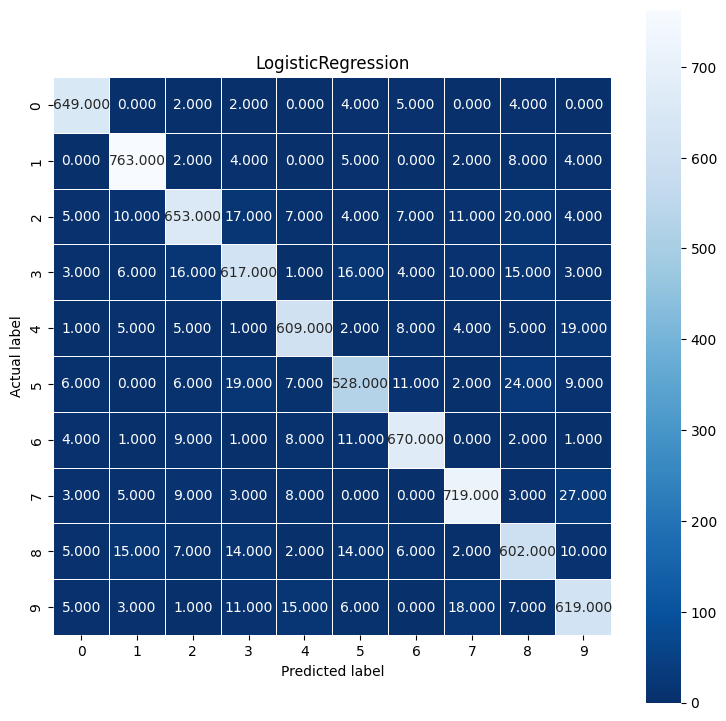

In [89]:
conf_matrix = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(9,9))
plt.title('LogisticRegression')
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 137.22222222222217, 'Predicted label')

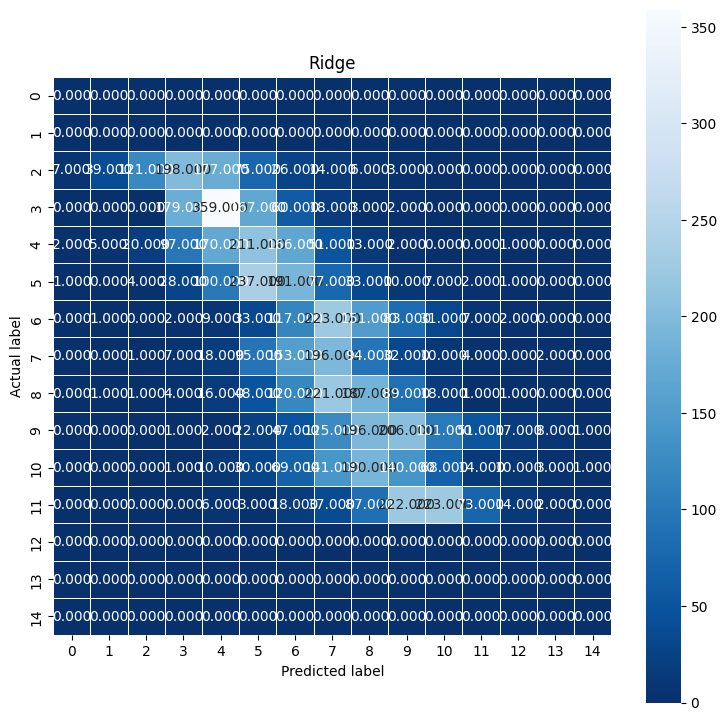

In [90]:
conf_matrix = confusion_matrix(y_test, np.round(ridge_pred, 0))
plt.figure(figsize=(9,9))
plt.title('Ridge')
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 137.22222222222217, 'Predicted label')

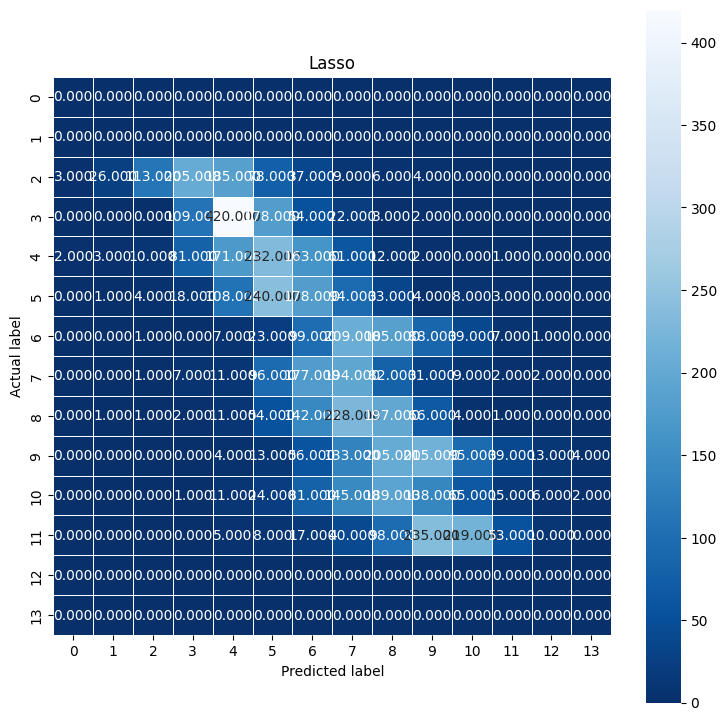

In [91]:
conf_matrix = confusion_matrix(y_test, np.round(lasso_pred, 0))
plt.figure(figsize=(9,9))
plt.title('Lasso')
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 137.22222222222217, 'Predicted label')

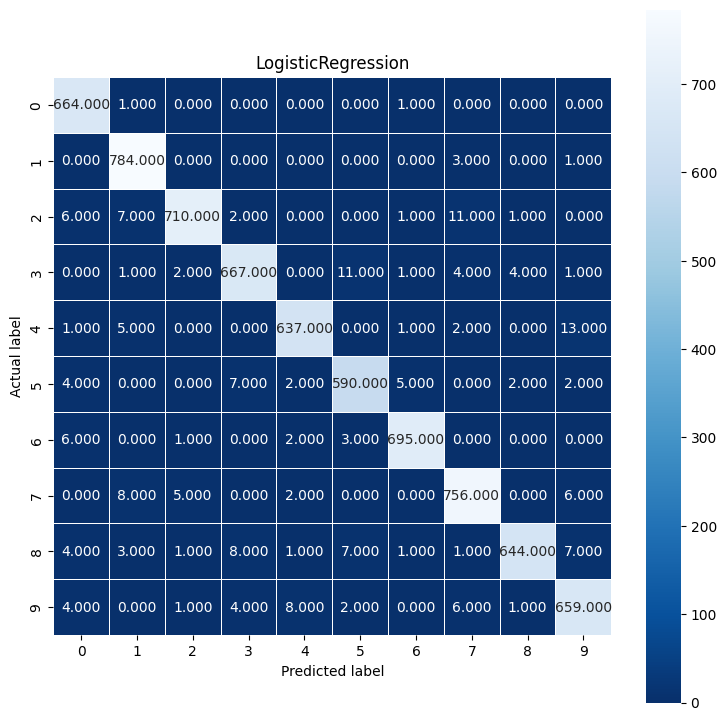

In [92]:
conf_matrix = confusion_matrix(y_test, best_knn_pred)
plt.figure(figsize=(9,9))
plt.title('LogisticRegression')
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 137.22222222222217, 'Predicted label')

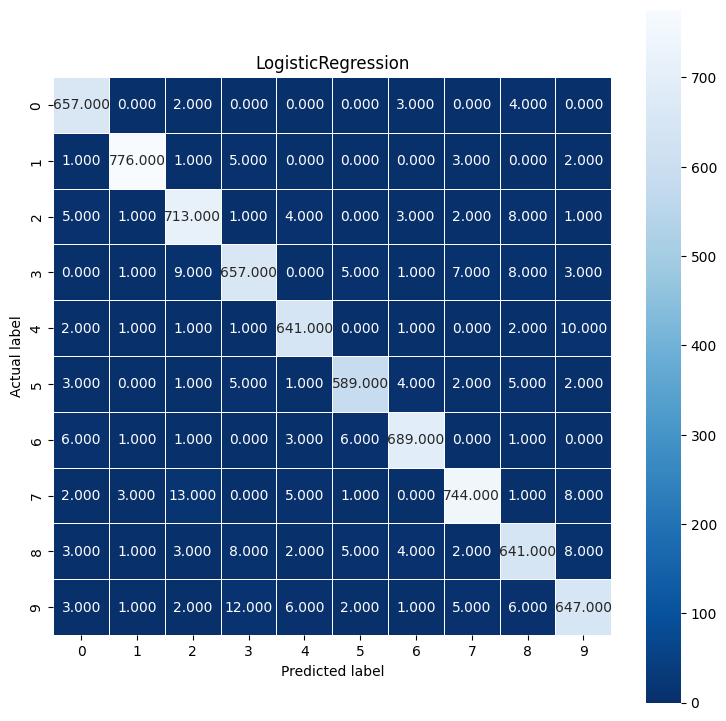

In [93]:
conf_matrix = confusion_matrix(y_test, best_forest_pred)
plt.figure(figsize=(9,9))
plt.title('LogisticRegression')
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 137.22222222222217, 'Predicted label')

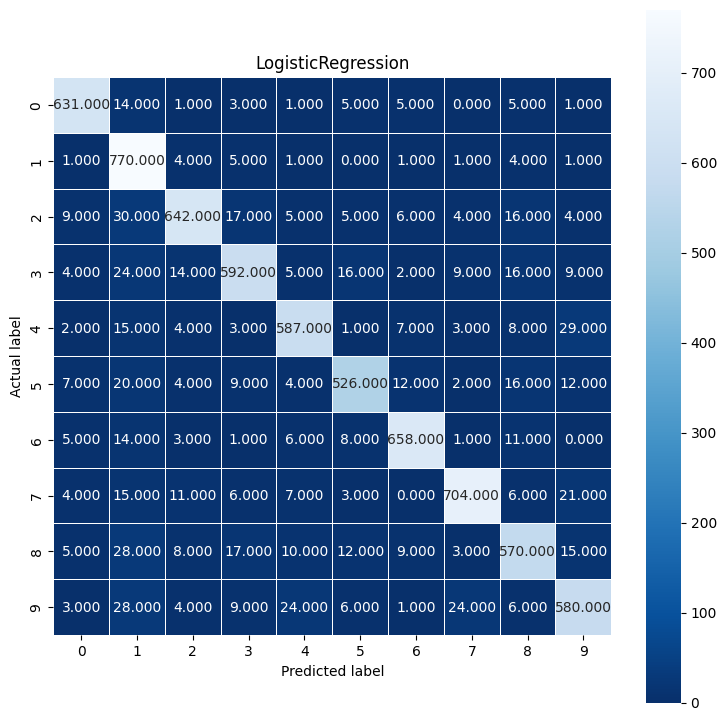

In [94]:
conf_matrix = confusion_matrix(y_test, boost_tree_pred)
plt.figure(figsize=(9,9))
plt.title('LogisticRegression')
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Понижаем размерность

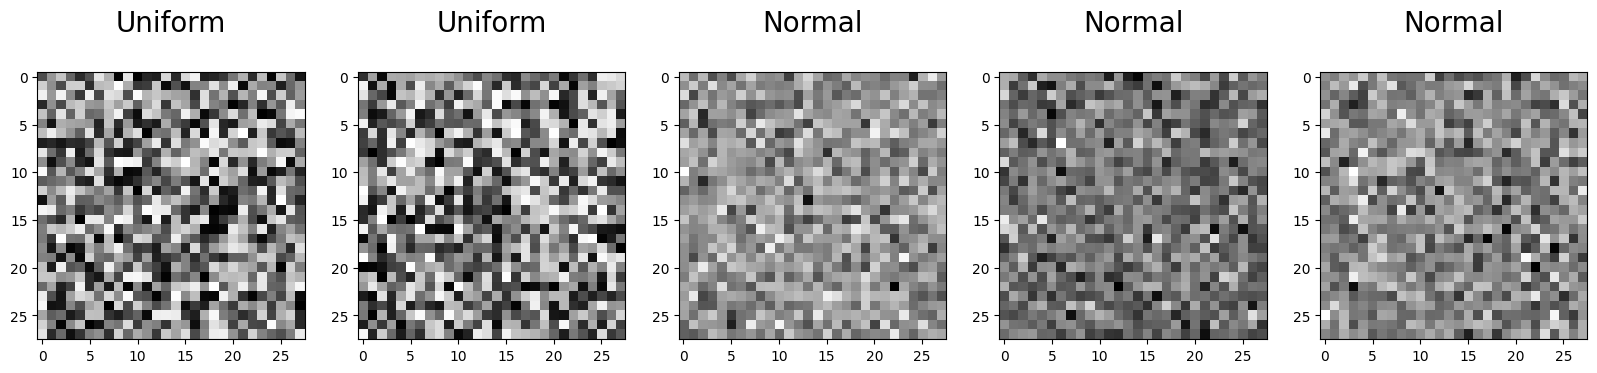

In [95]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    #сгенерируем из равномерного или нормального распределений
    is_normal = np.random.randint(0,2)
    if is_normal:
        image = np.random.randn(784)
    else:
        image = np.random.randint(0, 255, 784)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    
    label = "Normal" if is_normal else "Uniform"
    plt.title('%s\n' % label, fontsize = 20)

Заметим, что наши изображения далеки от случайного шума, т.е наши данные явно имеют размерность ниже, чем 784

**Пункт 3.1:** используя t-SNE, постройте визуализацию объектов на плоскости (чтобы все отрисовалось быстрее, стройте не на всей выборке, а только на 2000 элементах). Насколько хорошо выделились классы?

### В пунктах 3 и 4 работаем только с подвыборкой размера 2000!

In [96]:
from sklearn.manifold import TSNE


tsne_representation = TSNE().fit_transform(X_train[:2000])

In [97]:
import pandas as pd


tsne_repr = pd.DataFrame()
tsne_repr['tsne-2d-one'] = tsne_representation[:,0]
tsne_repr['tsne-2d-two'] = tsne_representation[:,1]
tsne_repr["y"] = y_train[:2000]

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

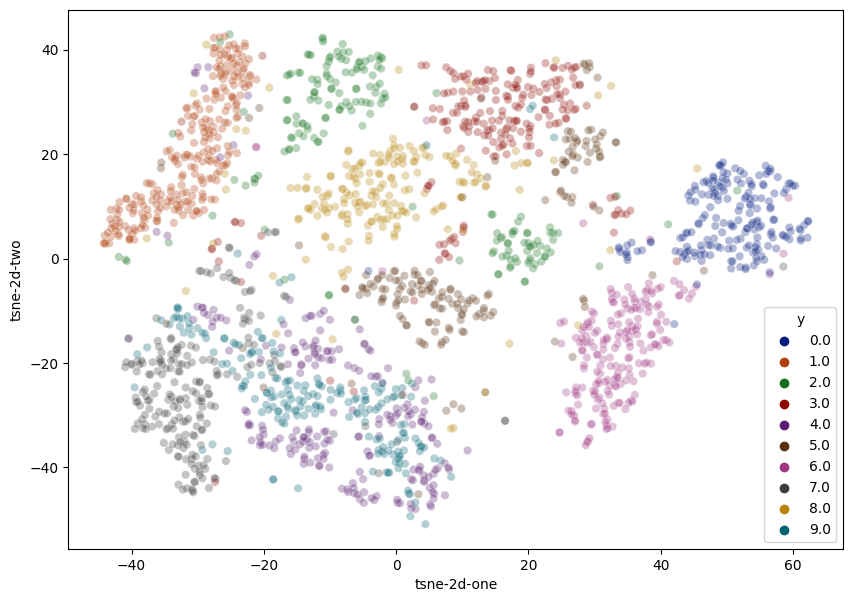

In [98]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 3.2 (за пункты 3.1+3.2 = 0.8 баллов)**: для сравнения постройте на тех же данных такую же визуализацию, используя метод главных компонент. Сравните две визуализации (по скорости построения, а также по качеству кластеризации)

In [99]:
from sklearn.decomposition import PCA


pca_representation = PCA(n_components=2).fit_transform(X_train[:2000])

<Axes: xlabel='pca-2d-one', ylabel='pca-2d-two'>

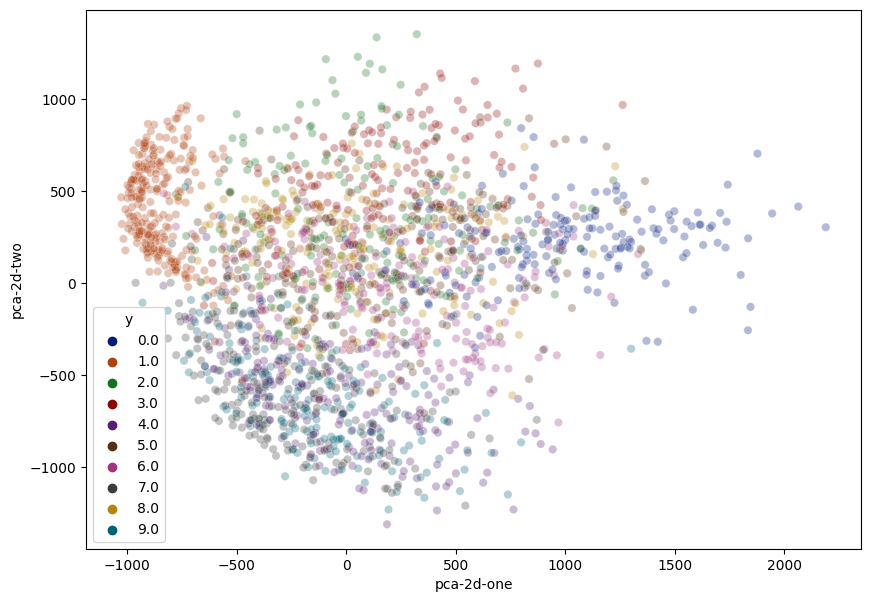

In [100]:
pca_repr = pd.DataFrame()
pca_repr['pca-2d-one'] = pca_representation[:,0]
pca_repr['pca-2d-two'] = pca_representation[:,1]
pca_repr["y"] = y_train[:2000]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=pca_repr,
    legend="full",
    alpha=0.3
)

# Кластеризация
Давайте временно отвлечемся на данные tsne_repr, полученные применением t-SNE к 2000 объектам train данных

In [101]:
tsne_repr.head()

,tsne-2d-one,tsne-2d-two,y
0,-17.362511,-11.763409,9.0
1,-1.778348,-37.433823,9.0
2,1.251853,-31.717525,9.0
3,-20.254808,-32.033146,4.0
4,35.614670,3.056281,0.0


**Пункт 4.1: (1 балл)** Давайте посмотрим на работу алгоритма DBSCAN (не передавайте метку класса y!). Зафиксируем минимальное количество объектов в корневой точке - 55. Подберите радиус окрестности (может быть дробным), чтобы dbscan выделил ровно 10 классов (включая класс выбросов "-1"), но так, чтобы в каждом классе (в шумовом в том числе) было не более 400 объектов. Последнее ограничение введено затем, чтобы большинство объектов не попало в один большой кластер, а остальные кластера оказались незначительно мелкими

In [104]:
from sklearn.cluster import DBSCAN

dbscan_repr = DBSCAN(eps=7.4, min_samples=60, metric='euclidean').fit(tsne_repr[['tsne-2d-one', 'tsne-2d-two']])

**Посмотрите на визуализацию точек выше, насколько адекватно был выбран радиус окрестности?**

Посмотрим, насклько качественно отработал DBSCAN

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

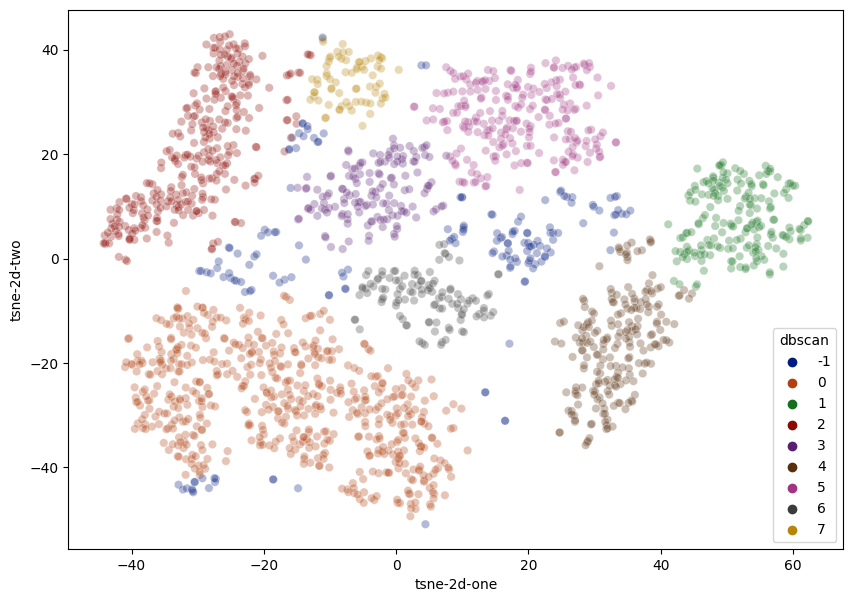

In [107]:
tsne_repr["dbscan"] = dbscan_repr.labels_

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dbscan",
    palette=sns.color_palette("dark", len(set(dbscan_repr.labels_))),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 5.1 (1 балл)**. Вернитесь ко всей выборке. Пользуясь критерием крутого спуска найдите характерную размерность данных.   
**Пункт 5.2 (1 балл)** Во время поиска эффективной размерности, ужимайте Train и test выборку до текущей раземрности и стройте понравивщуюся линейную модель на train данных, записывайте метрику качества на тестовых данных. Постройте график зависимости качества от размерности. Верно ли, что с качеством наблюдается такая же тенденция, что и с сохраненной дисперсией? Наблюдается ли крутой спуск/подъем? Если да, то происходит ли он на эффективном значении расзмерноти (где наблюдается крутой спуск потерянной дисперсии)?

Если на каждой итерации понижения размерности заставлять учиться модель, то это займет слишком много времени, поэтому я возьму "оптимальное" исходя из дисперсии

<BarContainer object of 784 artists>

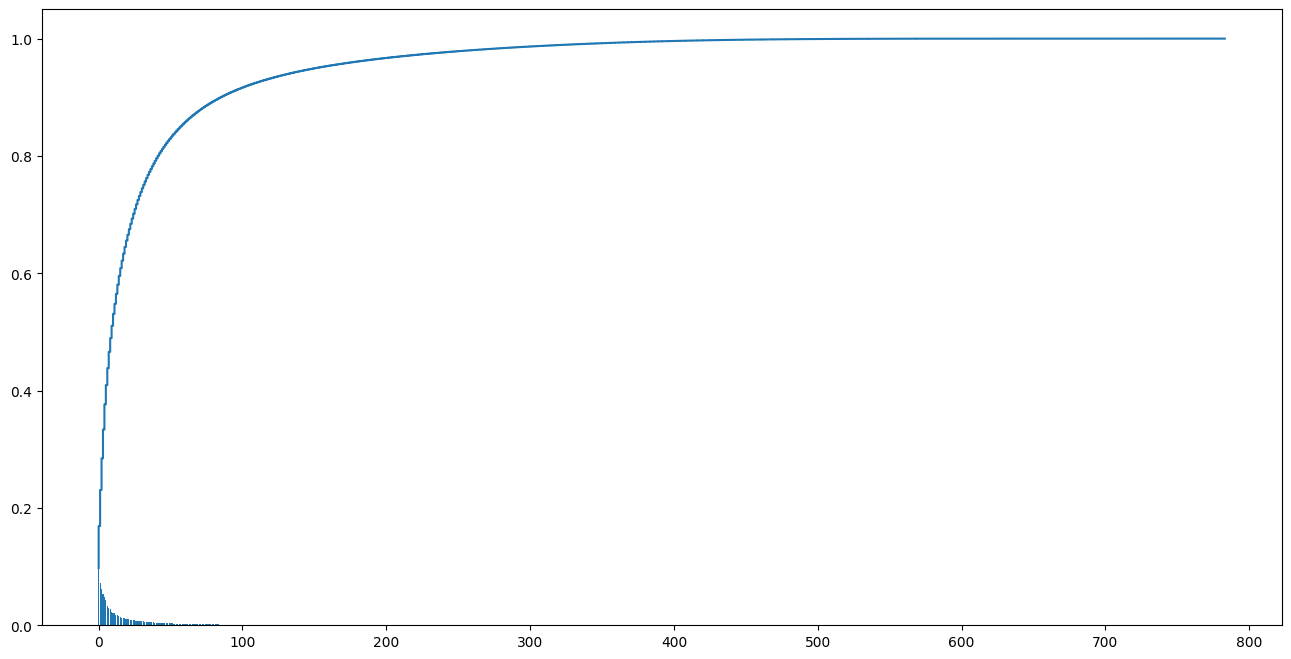

In [114]:
pca = PCA().fit(X_train)

expvar = pca.explained_variance_ratio_
cumsum_expvar = np.cumsum(expvar)

plt.figure(figsize=(16,8))
plt.step(np.arange(0, len(cumsum_expvar)), cumsum_expvar)
plt.bar(np.arange(0, len(expvar)), expvar)

Возьмем размерность 100, видно, что в таком пространстве содержится более 80% дисперсии

In [115]:
pca2 = PCA(n_components = 100).fit(X_train)

pca_X_train = pca2.transform(X_train)
pca_X_test = pca2.transform(X_test)

In [116]:
pca_model = LogisticRegression().fit(pca_X_train, y_train)
pca_pred = pca_model.predict(pca_X_test)

In [117]:
print('accuracy for logistic regression on pca_decomp_data with dim=100:', accuracy_score(y_test, pca_pred))

accuracy for logistic regression on pca_decomp_data with dim=100: 0.9084285714285715


качество упало всего лишь на 1%

# Строим модели на данных меньшей размерности
Понизьте размерность данных до эффективной размерности (помните, что это не то значение, на котором происходит резкий спуск, а следующее)

**Пункт 6.1 (0.9 баллов)** Постройте линейные модели, kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели. Сравните качества с достигнутыми качествами до понижения размерности. Сделайте выводы.

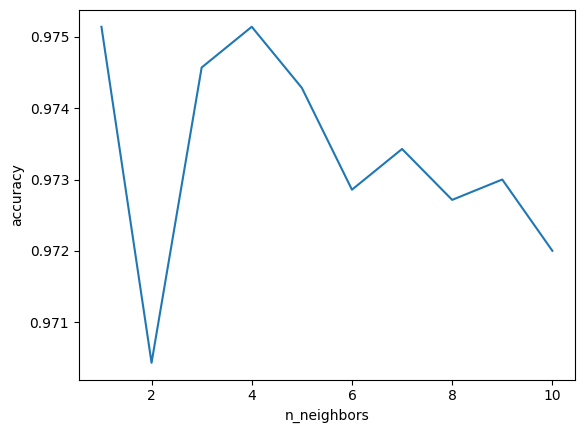

In [118]:
knn_grid = list(range(1, 11))
knn_accuracy = [None for _ in knn_grid]
for k_id in range(len(knn_grid)):
    knn = KNeighborsClassifier(n_neighbors=knn_grid[k_id]).fit(pca_X_train, y_train)
    knn_pred = knn.predict(pca_X_test)
    knn_accuracy[k_id] = accuracy_score(y_test, knn_pred)
    clear_output(True)
    plt.plot(knn_grid, knn_accuracy)
    plt.xlabel('n_neighbors')
    plt.ylabel('accuracy')
    plt.show()

In [120]:
best_knn = KNeighborsClassifier(n_neighbors=4).fit(pca_X_train, y_train)
best_knn_pred = best_knn.predict(pca_X_test)

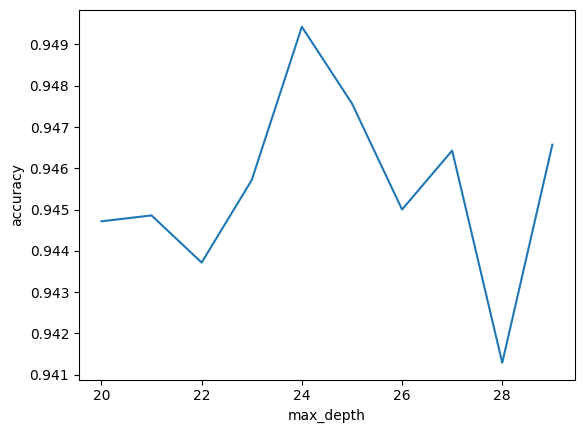

In [121]:
forest_grid = list(range(20, 30))
forest_accuracy = [None for _ in forest_grid]
for depth_id in range(len(forest_grid)):
    forest = RandomForestClassifier(n_estimators=50, max_depth=forest_grid[depth_id]).fit(pca_X_train, y_train)
    forest_pred = forest.predict(pca_X_test)
    forest_accuracy[depth_id] = accuracy_score(y_test, forest_pred)
    clear_output(True)
    plt.plot(forest_grid, forest_accuracy)
    plt.xlabel('max_depth')
    plt.ylabel('accuracy')
    plt.show()

In [124]:
best_forest = RandomForestClassifier(n_estimators=50, max_depth=24).fit(pca_X_train, y_train)
best_forest_pred = best_forest.predict(pca_X_test)

In [125]:
boost_tree = GradientBoostingClassifier(n_estimators=3, max_depth=24, subsample=0.3).fit(pca_X_train, y_train)
boost_tree_pred = boost_tree.predict(pca_X_test)

In [126]:
logreg = LogisticRegression().fit(pca_X_train, y_train)
logreg_pred = logreg.predict(pca_X_test)

In [127]:
ridge = Ridge().fit(pca_X_train, y_train)
ridge_pred = ridge.predict(pca_X_test)

In [128]:
lasso = Lasso().fit(pca_X_train, y_train)
lasso_pred = lasso.predict(pca_X_test)

In [129]:
print('logistic regression accuracy =', accuracy_score(y_test, logreg_pred))
print('ridge accuracy =', accuracy_score(y_test, np.round(ridge_pred, 0)))
print('lasso accuracy =', accuracy_score(y_test, np.round(lasso_pred, 0)))
print('knn accuracy =', accuracy_score(y_test, best_knn_pred))
print('random forest accuracy =', accuracy_score(y_test, best_forest_pred))
print('boosted trees accuracy =', accuracy_score(y_test, boost_tree_pred))

logistic regression accuracy = 0.9084285714285715
ridge accuracy = 0.2002857142857143
lasso accuracy = 0.19557142857142856
knn accuracy = 0.9751428571428571
random forest accuracy = 0.949
boosted trees accuracy = 0.8442857142857143


И хотя гиперпараметры изменились, все же accuracy у KNN стало еще лучше - эта модель для данной задачи ведет себя как выброс)))))

**Пункт 6.2 (0.9 баллов)** Отнормируйте признаки используя StandardScaler. Постройте те же типы моделей, что и в предыдущем пункте, подберите оптимальные гиперпараметры. Сравните метрики качества, сделайте выводы

In [130]:
from sklearn.preprocessing import StandardScaler

In [132]:
scaler = StandardScaler().fit(pca_X_train)
scaled_X_train = scaler.transform(pca_X_train)
scaled_X_test = scaler.transform(pca_X_test)

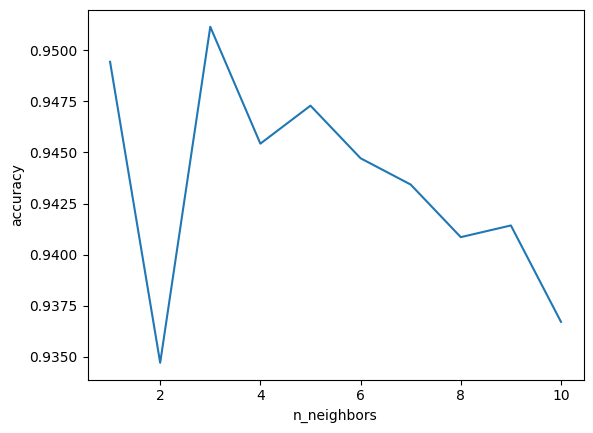

In [133]:
knn_grid = list(range(1, 11))
knn_accuracy = [None for _ in knn_grid]
for k_id in range(len(knn_grid)):
    knn = KNeighborsClassifier(n_neighbors=knn_grid[k_id]).fit(scaled_X_train, y_train)
    knn_pred = knn.predict(scaled_X_test)
    knn_accuracy[k_id] = accuracy_score(y_test, knn_pred)
    clear_output(True)
    plt.plot(knn_grid, knn_accuracy)
    plt.xlabel('n_neighbors')
    plt.ylabel('accuracy')
    plt.show()

In [134]:
best_knn = KNeighborsClassifier(n_neighbors=3).fit(scaled_X_train, y_train)
best_knn_pred = best_knn.predict(scaled_X_test)

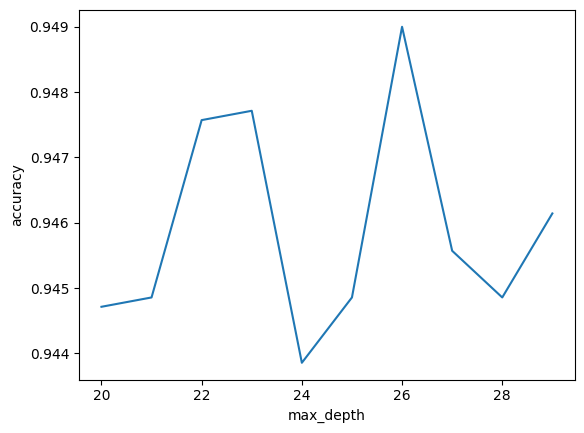

In [135]:
forest_grid = list(range(20, 30))
forest_accuracy = [None for _ in forest_grid]
for depth_id in range(len(forest_grid)):
    forest = RandomForestClassifier(n_estimators=50, max_depth=forest_grid[depth_id]).fit(scaled_X_train, y_train)
    forest_pred = forest.predict(scaled_X_test)
    forest_accuracy[depth_id] = accuracy_score(y_test, forest_pred)
    clear_output(True)
    plt.plot(forest_grid, forest_accuracy)
    plt.xlabel('max_depth')
    plt.ylabel('accuracy')
    plt.show()

In [136]:
best_forest = RandomForestClassifier(n_estimators=50, max_depth=26).fit(scaled_X_train, y_train)
best_forest_pred = best_forest.predict(scaled_X_test)

In [137]:
boost_tree = GradientBoostingClassifier(n_estimators=3, max_depth=26, subsample=0.3).fit(scaled_X_train, y_train)
boost_tree_pred = boost_tree.predict(scaled_X_test)

In [138]:
logreg = LogisticRegression().fit(scaled_X_train, y_train)
logreg_pred = logreg.predict(scaled_X_test)

In [139]:
ridge = Ridge().fit(scaled_X_train, y_train)
ridge_pred = ridge.predict(scaled_X_test)

In [140]:
lasso = Lasso().fit(scaled_X_train, y_train)
lasso_pred = lasso.predict(scaled_X_test)

In [141]:
print('logistic regression accuracy =', accuracy_score(y_test, logreg_pred))
print('ridge accuracy =', accuracy_score(y_test, np.round(ridge_pred, 0)))
print('lasso accuracy =', accuracy_score(y_test, np.round(lasso_pred, 0)))
print('knn accuracy =', accuracy_score(y_test, best_knn_pred))
print('random forest accuracy =', accuracy_score(y_test, best_forest_pred))
print('boosted trees accuracy =', accuracy_score(y_test, boost_tree_pred))

logistic regression accuracy = 0.9168571428571428
ridge accuracy = 0.2002857142857143
lasso accuracy = 0.02642857142857143
knn accuracy = 0.9511428571428572
random forest accuracy = 0.9477142857142857
boosted trees accuracy = 0.8454285714285714


Гиперпараметры снова изменились - ничего удивительного, качество accuracy изменилось несильно. О скорости обучения говорить немного некорректно, так как весь ноутбук в целом уже перегружен и все обучается дольше